In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# Set your directory here
directory = "../Resiel Maps/Resiel Precision Maps/Cleaned_joined_output/DEM_joined_output"

files = [f for f in os.listdir(directory) if f.endswith('.csv')]
df_list = []

for file in files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    df['Year'] = file.split('_')[2]
    df_list.append(df)

# concatenate them together
final_df = pd.concat(df_list)
final_df = final_df[final_df['PlotID'] > 0]
final_df['PlotID'] = final_df['PlotID'].astype(int).astype(str)
final_df = final_df[['Longitude', 'Latitude', 'Yield', 'Moisture', 'Year', 'PlotID', 'FieldID', 'elevation', 'slope', 'aspect']]
final_df = final_df[final_df['FieldID'] == '6-12']

final_df.head()

,Longitude,Latitude,Yield,Moisture,Year,PlotID,FieldID,elevation,slope,aspect
1819,-96.888612,31.458173,33.524,12.1,2018,1,6-12,170.531021,2.333634,144.447983
1820,-96.888585,31.458187,32.353,12.1,2018,1,6-12,170.581345,2.283199,162.608688
1821,-96.888555,31.458202,36.829,12.1,2018,1,6-12,170.594910,0.874914,146.440933
1822,-96.888526,31.458215,33.759,12.1,2018,1,6-12,170.663925,1.601933,148.674362
1823,-96.888497,31.458228,35.226,12.1,2018,1,6-12,170.654266,0.636427,133.163162


# 6-12

In [3]:
# 16A Key 
# Controls:
# 4: [1, 5, 7], 6: [3, 5, 9], 8: [5, 7, 9], 10: [7, 11, 13], 12: [9, 11, 15], 14: [11, 13, 15], 16: [13, 17, 19], 18: [15, 17, 21], 20: [17, 19, 21]
# Define the dictionary for 'PlotID' and 'Controls'
control_dict = {4: [1, 5, 7], 6: [3, 5, 9], 8: [5, 7, 9], 10: [7, 11, 13], 12: [9, 11, 15], 14: [11, 13, 15], 16: [13, 17, 19], 18: [15, 17, 21], 20: [17, 19, 21]}
control_dict = {str(k): [str(i) for i in v] for k, v in control_dict.items()}
 
final_df_controls = final_df.copy()

# Define a function that assigns controls based on FieldID and PlotID
def assign_controls(row, controls_dict):
    if row['FieldID'] == 'Y10' and str(row['PlotID']) in controls_dict:
        return controls_dict[str(row['PlotID'])]
    else:
        return 'None'

# Apply the function to create the new 'Controls' column
final_df_controls['Controls'] = final_df_controls.apply(assign_controls, args=(control_dict,), axis=1)
# Apply the function to create the new 'Optional controls' column
# final_df_controls['Optional controls'] = final_df_controls.apply(assign_controls, args=(optional_controls_dict,), axis=1)

# final_df_controls = final_df_controls[final_df_controls['Controls'] != 'None']
final_df_controls.head()

,Longitude,Latitude,Yield,Moisture,Year,PlotID,FieldID,elevation,slope,aspect,Controls
1819,-96.888612,31.458173,33.524,12.1,2018,1,6-12,170.531021,2.333634,144.447983,None
1820,-96.888585,31.458187,32.353,12.1,2018,1,6-12,170.581345,2.283199,162.608688,None
1821,-96.888555,31.458202,36.829,12.1,2018,1,6-12,170.594910,0.874914,146.440933,None
1822,-96.888526,31.458215,33.759,12.1,2018,1,6-12,170.663925,1.601933,148.674362,None
1823,-96.888497,31.458228,35.226,12.1,2018,1,6-12,170.654266,0.636427,133.163162,None


In [4]:

control_dict

{'4': ['1', '5', '7'],
 '6': ['3', '5', '9'],
 '8': ['5', '7', '9'],
 '10': ['7', '11', '13'],
 '12': ['9', '11', '15'],
 '14': ['11', '13', '15'],
 '16': ['13', '17', '19'],
 '18': ['15', '17', '21'],
 '20': ['17', '19', '21']}

In [6]:
# Treatments:
# Low = 6, 10, 20
# Medium = 4, 14, 18
# High = 8, 12, 16

final_df_controls_treatments = final_df_controls.copy()

# Define the lists of PlotIDs for each treatment
low = ['6', '10', '20']
medium = ['4', '14', '18']
high = ['8', '12', '16']

# Define a function to determine the treatment based on PlotID
def assign_treatment(plot_id):
    if plot_id in low:
        return 'Low'
    elif plot_id in medium:
        return 'Medium'
    elif plot_id in high:
        return 'High'
    else:
        return 'Control'

# Apply the function to the 'PlotID' column to create the new 'Treatment' column
final_df_controls_treatments['Treatment'] = final_df_controls_treatments['PlotID'].apply(assign_treatment)
final_df_controls_only = final_df_controls_treatments.copy()
final_df_controls_only = final_df_controls_only[final_df_controls_only['Controls'] == 'None']
final_df_treatments = final_df_controls_treatments[final_df_controls_treatments['Treatment'] != 'Control']
final_df_treatments.head()

,Longitude,Latitude,Yield,Moisture,Year,PlotID,FieldID,elevation,slope,aspect,Controls,Treatment
1875,-96.888661,31.458215,46.523,12.1,2018,4,6-12,170.661606,1.627590,162.034515,None,Medium
1876,-96.888634,31.458227,40.073,12.1,2018,4,6-12,170.676666,1.550613,277.803528,None,Medium
1877,-96.888608,31.458241,39.613,12.1,2018,4,6-12,170.694794,1.479199,152.778183,None,Medium
1878,-96.888582,31.458254,38.498,12.1,2018,4,6-12,170.714172,1.617975,156.930450,None,Medium
1879,-96.888555,31.458266,37.912,12.1,2018,4,6-12,170.760269,0.288875,335.742615,None,Medium


In [7]:
final_df_controls_only.head()

,Longitude,Latitude,Yield,Moisture,Year,PlotID,FieldID,elevation,slope,aspect,Controls,Treatment
1819,-96.888612,31.458173,33.524,12.1,2018,1,6-12,170.531021,2.333634,144.447983,None,Control
1820,-96.888585,31.458187,32.353,12.1,2018,1,6-12,170.581345,2.283199,162.608688,None,Control
1821,-96.888555,31.458202,36.829,12.1,2018,1,6-12,170.594910,0.874914,146.440933,None,Control
1822,-96.888526,31.458215,33.759,12.1,2018,1,6-12,170.663925,1.601933,148.674362,None,Control
1823,-96.888497,31.458228,35.226,12.1,2018,1,6-12,170.654266,0.636427,133.163162,None,Control


## Calculating relative yield

In [18]:
# Convert 'Yield' to numeric type for both DataFrames
final_df_controls_only['Yield'] = pd.to_numeric(final_df_controls_only['Yield'])
final_df_treatments['Yield'] = pd.to_numeric(final_df_treatments['Yield'])

# Calculate average yield for each PlotID and Year in controls DataFrame
average_yield_controls = final_df_controls_only.groupby(['PlotID', 'Year'])['Yield'].mean().to_dict()

# Create a copy of the treatments DataFrame for manipulation
final_df_treatments_plotting = final_df_treatments.copy()

# Create a new column "Average Control Yield" in final_df_treatments using average_yield_controls and control_dict
# Here we get the average yield for each control and then take the mean of those averages
final_df_treatments_plotting['Average Control Yield'] = [
    np.mean([average_yield_controls.get((control, row['Year']), np.nan) for control in control_dict[str(row['PlotID'])]])
    for index, row in final_df_treatments.iterrows()
]

# Now calculate "Relative Yield" using "Yield" and "Average Control Yield" for each row in final_df_treatments
final_df_treatments_plotting['Relative Yield'] = [
    (row['Yield'] - row['Average Control Yield']) / row['Average Control Yield'] * 100 
    for index, row in final_df_treatments_plotting.iterrows()
]

# Print the head of final_df_treatments
final_df_treatments_plotting.head()

/home/bostevens/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Longitude,Latitude,Yield,Moisture,Year,PlotID,FieldID,elevation,slope,aspect,Controls,Treatment,Average Control Yield,Relative Yield
1875,-96.888661,31.458215,46.523,12.1,2018,4,6-12,170.661606,1.627590,162.034515,None,Medium,37.376451,24.471421
1876,-96.888634,31.458227,40.073,12.1,2018,4,6-12,170.676666,1.550613,277.803528,None,Medium,37.376451,7.214566
1877,-96.888608,31.458241,39.613,12.1,2018,4,6-12,170.694794,1.479199,152.778183,None,Medium,37.376451,5.983844
1878,-96.888582,31.458254,38.498,12.1,2018,4,6-12,170.714172,1.617975,156.930450,None,Medium,37.376451,3.000683
1879,-96.888555,31.458266,37.912,12.1,2018,4,6-12,170.760269,0.288875,335.742615,None,Medium,37.376451,1.432851


In [19]:
final_df_treatments_plotting['FieldID'] = '6-12'
final_df_treatments_plotting.to_csv('../Data/Relative_yield/6-12.csv')

In [9]:
# Validating data
# # 4: 1, 5, 7
# final_df_controls_only_tmp = final_df_controls_only.copy()
# final_df_controls_only_tmp = final_df_controls_only_tmp.groupby(['PlotID','Year']).mean().reset_index()
# print('Calculated mean: ', str(final_df_treatments_plotting[(final_df_treatments_plotting['PlotID'] == '4') & (final_df_treatments_plotting['Year'] == '2018')]['Average Control Yield'].values))
# control_average_temp = []
# for plot in [1, 5, 7]:
#     control_average_temp.append(final_df_controls_only_tmp[(final_df_controls_only_tmp['PlotID'] == str(plot)) & (final_df_controls_only_tmp['Year'] == '2018')]['Yield'].values)
# print('Actual mean: ', str(np.mean(control_average_temp)))

## Plotting

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

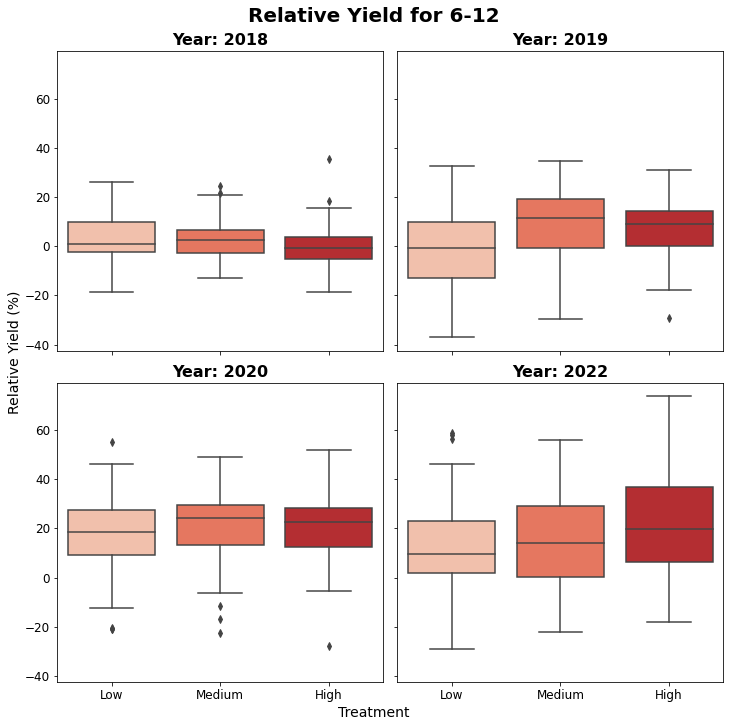

In [20]:
# Assuming 'Year' column is categorical and contains four distinct years
years = final_df_treatments_plotting['Year'].unique()

fig, axs = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

treatment_order = ['Low', 'Medium', 'High']  # Order of categories on x-axis

# Setting font sizes
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
title_font = {'fontname':'DejaVu Sans', 'size':'16', 'color':'black', 'weight':'bold'}

for ax, year in zip(axs.flatten(), years):
    data = final_df_treatments_plotting[final_df_treatments_plotting['Year'] == year]
    sns.boxplot(x='Treatment', y='Relative Yield', data=data, ax=ax, palette="Reds", order=treatment_order)
    ax.set_title(f'Year: {year}', **title_font)
    ax.set_xlabel('')  # remove individual subplot x-axis label
    ax.set_ylabel('')  # remove individual subplot y-axis label

# Set a common x and y labels
fig.text(0.5, 0, 'Treatment', ha='center', va='center', fontsize=14)
fig.text(0, 0.5, 'Relative Yield (%)', ha='center', va='center', rotation='vertical', fontsize=14)

# Adding title for the entire figure
fig.suptitle("Relative Yield for 6-12", fontsize=20, weight='bold')

plt.tight_layout()
plt.savefig('../Manuscript/Figures/6-12_relative_yield.jpg', bbox_inches = 'tight', dpi = 300)

# Random forest

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Let's suppose your DataFrame is final_df_treatments_plotting
df = final_df_treatments_plotting

# Define predictors and target
X = df[['Moisture', 'elevation', 'slope', 'aspect', 'Year']]
y = df['Relative Yield']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

# Set up parameters for grid search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize a random forest regressor
rf = RandomForestRegressor()

# Initialize grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X_train, y_train)

# Use best model from grid search
best_grid = grid_search.best_estimator_

# Predict
y_pred = best_grid.predict(X_test)

# Calculate R2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Get feature importances
feature_importances = best_grid.feature_importances_

# Save results in dictionary
results = {
    'r2': r2,
    'mse': mse,
    'feature_importances': dict(zip(X.columns, feature_importances))
}

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:   46.9s finished


In [22]:
results

{'r2': 0.27969890023536637,
 'mse': 177.66144518852164,
 'feature_importances': {'Moisture': 0.11192455491894265,
  'elevation': 0.24460706046421746,
  'slope': 0.20950090849248815,
  'aspect': 0.22499636577942989,
  'Year': 0.20897111034492197}}